<a href="https://colab.research.google.com/github/Songurdevoloper/Regression-with-the-Pseudoinverse/blob/main/Regression_with_the_Pseudoinverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression with the Pseudoinverse

For regression problems, we typically have many more cases (n or rows of **X**) than features to predict (m or columns of **X**) let's solve a miniature example of such an overdetermined situation.

We have eight data points (n=8):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

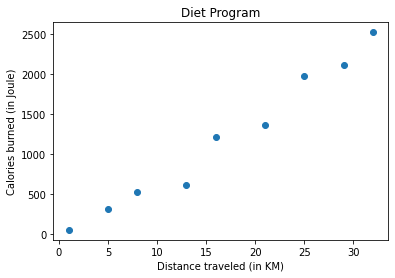

In [34]:
x1 = [1, 5, 8, 13, 16, 21, 25, 29, 32] # Distance traveled to burn calories (in Kilometers)
y = [47.20, 311.11, 522.2, 611.3, 1212, 1355.6, 1973, 2110.8, 2520.3] # Calories burned to lose weight (in Joules)

title = "Diet Program"
xlabel = "Distance traveled (in KM)"
ylabel = "Calories burned (in Joule)"

fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Altrough it appears there is only one predictor (X<sub>1</sub>), we need a second one (let's call it X<sub>0</sub>) in order to allow for a y-intercept (therefire, m=2). Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The y-intercept is constant across all he points so we can set it equal to `1` across the board

In [35]:
x0 = np.ones(9)
x0

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Concatenate X<sub>0</sub> and X<sub>1</sub> into a matrix **X**

In [36]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[ 1.,  1.],
        [ 1.,  5.],
        [ 1.,  8.],
        [ 1., 13.],
        [ 1., 16.],
        [ 1., 21.],
        [ 1., 25.],
        [ 1., 29.],
        [ 1., 32.]])

We know that we can calculate the weights **w** using the equation **w = X<sup>+</sup>y**:

In [37]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[-137.39042048,   79.3334919 ]])

The first weights corresponds to the y-intercept of the line, which is typically denoted as b:

In [38]:
b = np.asarray(w).reshape(-1)[0]
b

-137.3904204839094

While the second weight corresponds to the slope of the line, which is typically denoted as m:

In [39]:
m = np.asarray(w).reshape(-1)[1]
m

79.33349189570121

With the weights we can plot the line to confirm it fits the points:

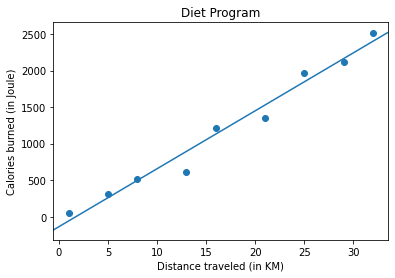

In [40]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_min, y_max = m * x_min + b, m * x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_min, y_max])

In [44]:
x_min, x_max

(-0.55, 33.55)

In [50]:
(m * x_min + b), (m * x_max + b) # y-min # y-max

(-181.02384102654506, 2524.248232616866)

In [51]:
x_min, y_min

(-0.55, -181.02384102654506)

In [52]:
x_max, y_max

(33.55, 2524.248232616866)